<a href="https://colab.research.google.com/github/mohammed0605/Data_Visualization/blob/main/USECASE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Monthly Average Performance (by Weekly_Sales) ===
month
12    1281863.63
11    1147265.90
6     1064324.59
2     1053199.80
8     1048017.45
7     1031747.58
5     1031714.02
4     1026761.56
3     1013309.23
10     999632.12
9      989335.35
1      923884.55
Name: Weekly_Sales, dtype: float64

=== Best and Worst Month Overall (by total Weekly_Sales) ===
Best Month (by total Weekly Sales): Month 7
Worst Month (by total Weekly Sales): Month 1

=== Monthly Changes in Total Weekly Sales ===
month
1              NaN
2     2.361295e+08
3     2.405801e+07
4     5.407388e+07
5    -8.973421e+07
6     6.550431e+07
7     2.737109e+07
8    -3.691077e+07
9    -3.432903e+07
10    6.023608e+06
11   -1.717691e+08
12    1.638229e+08
Name: Weekly_Sales, dtype: float64


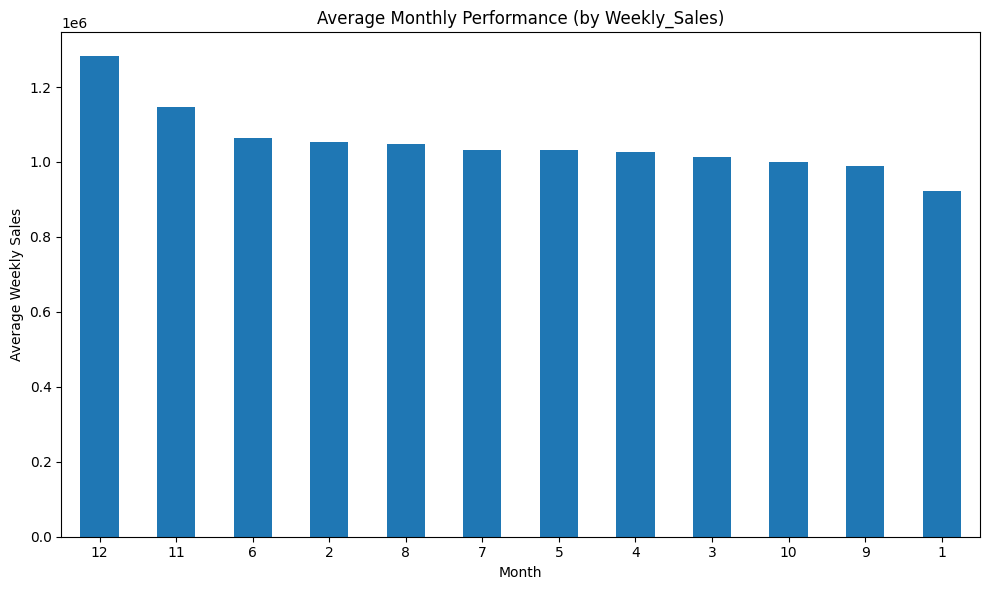

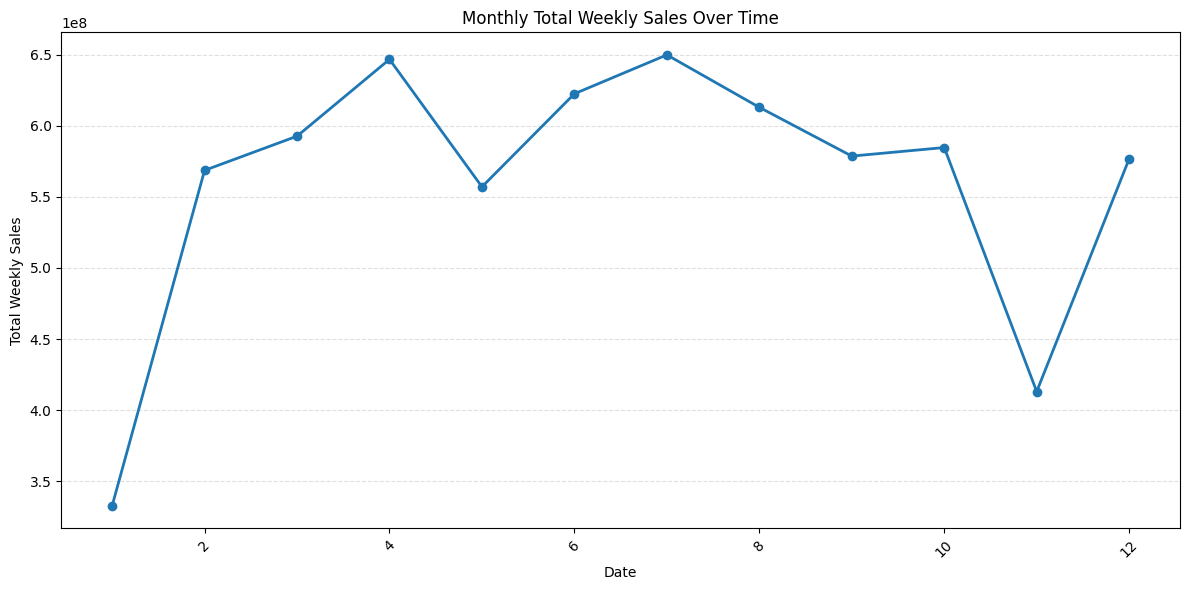

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

df['month'] = df.index.month
yearly_avg = df.groupby('month')['Weekly_Sales'].mean().round(2).sort_values(ascending=False)

monthly_total = df.groupby('month')['Weekly_Sales'].sum()
best_month = monthly_total.idxmax()
worst_month = monthly_total.idxmin()


print("\n=== Monthly Average Performance (by Weekly_Sales) ===")
print(yearly_avg)
print("\n=== Best and Worst Month Overall (by total Weekly_Sales) ===")
print(f"Best Month (by total Weekly Sales): Month {best_month}")
print(f"Worst Month (by total Weekly Sales): Month {worst_month}")

monthly_changes = monthly_total.diff().round(2)
print("\n=== Monthly Changes in Total Weekly Sales ===")
print(monthly_changes)
plt.figure(figsize=(10,6))
yearly_avg.plot(kind='bar')
plt.title("Average Monthly Performance (by Weekly_Sales)")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
monthly_total.plot(marker='o', linewidth=2)
plt.title("Monthly Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()